In [1]:
from analysis import *
from utils import *
from pathlib import Path


params = [
    (2, 40),
    (3, 20),
    (4, 12),
    (5, 10),
    (6, 10)
]


# Slopes 

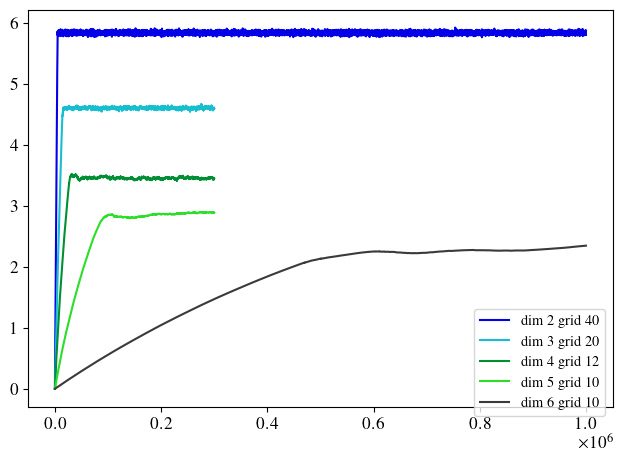

In [2]:
fig, ax = plt.subplots()

for dim, grid in params:
    path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco/data_0.slopes.npy")
    step, slope = load_slope_values(path_dir.__str__())

    draw_slope(slope, step, ax=ax, label=f"dim {dim} grid {grid}")

fig.legend(fontsize="small", loc="lower right", bbox_to_anchor=(0.97, 0.1))


# Calculate the scaling exponents

## Visual assessment

In [2]:
dim, grid = 6, 10
path_dir = Path(f"data/d{dim}_g{grid}_c7_cl_nco")
data = load_combine_avalanche_data_samples(path_dir, False)

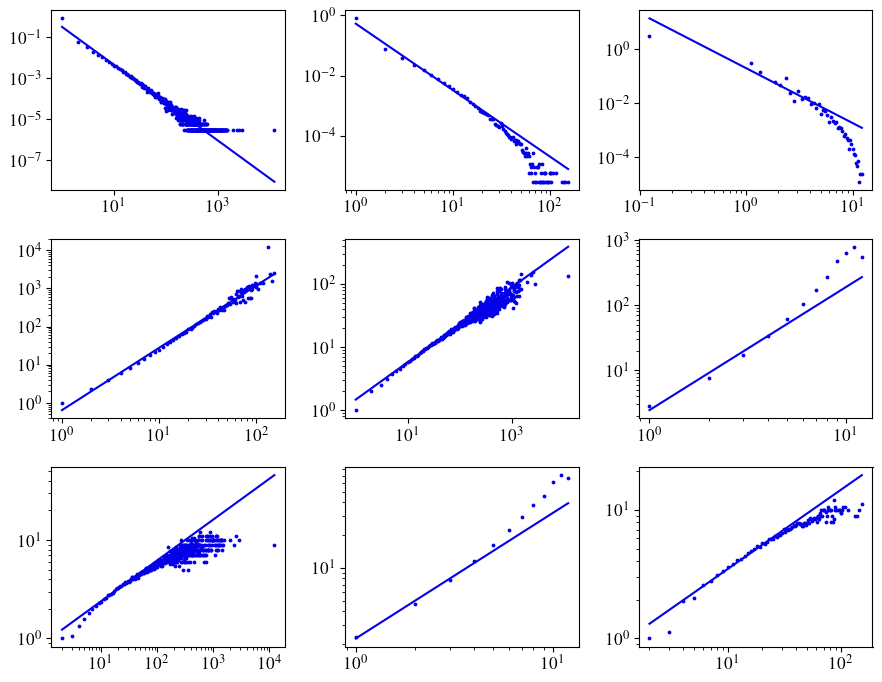

In [3]:
df, amps = calculate_all_scaling_exponents(data, [
    (None, 100), (None, 20), (1, 4.5),
    (None, 90), (3, 100), (0.2, 6),
    (5, 50), (0.2, 5), (3, 30)])

plot_scaling_exponents(data, df.iloc[0], amps)


In [23]:
df.map(lambda x: "{:.1uSP}".format(x))

,tau,alpha,lambda,gamma1,1/gamma1,gamma2,1/gamma2,gamma3,1/gamma3
0,2.365(7),2.50(2),2.3(1),1.607(8),0.603(2),2.37(3),0.422(3),1.40(1),0.670(7)


## Generating the table

In [4]:
params = [
    (2, 40),
    (3, 20),
    (4, 12),
    (5, 10),
    (6, 10)
]

limits = [
    [
        (None, 100), (None, 80), (1, 12),
        (None, 105), (7, 1_000), (3, 10.5),
        (10.5, 150), (3, 10.5), (5, 80)
    ],
    [
        (None, 100), (None, 40), (1, 8),
        (None, 90), (7, 120), (3, 10.5),
        (10.5, 150), (3, 10.5), (3, 80)
    ],
    [
        (None, 100), (None, 20), (1, 4.5),
        (None, 90), (7, 120), (0.2, 6),
        (6, 70), (1, 15), (3, 30)
    ],
    [
        (None, 100), (None, 20), (1, 4.5),
        (None, 90), (3, 100), (0.2, 6),
        (5, 50), (0.2, 5), (3, 30)
    ],
    [
        (None, 100), (None, 20), (1, 4.5),
        (None, 90), (3, 100), (0.2, 6),
        (5, 50), (0.2, 5), (3, 30)
    ]
]

df = pd.DataFrame()

for _limits, (_dim, _grid) in zip(limits, params):
    path_dir = Path(f"data/d{_dim}_g{_grid}_c7_cl_nco")
    data = load_combine_avalanche_data_samples(path_dir, False)
    curr_df, _ = calculate_all_scaling_exponents(data, _limits)
    df = pd.concat([df, curr_df]).reset_index(drop=True)

df.map(lambda x: "{:.1uSP}".format(x))


,tau,alpha,lambda,gamma1,1/gamma1,gamma2,1/gamma2,gamma3,1/gamma3
0,1.997(4),1.990(8),1.7(1),1.534(5),0.608(1),1.82(2),0.540(2),1.17(1),0.802(3)
1,2.365(7),2.50(2),2.3(1),1.607(8),0.603(2),2.37(3),0.422(3),1.40(1),0.670(7)
2,2.62(1),2.79(4),2.54(7),1.58(1),0.589(3),1.7(1),0.424(5),1.42(2),0.67(1)
3,2.79(2),3.05(5),2.9(1),1.55(2),0.599(4),1.8(1),0.427(6),1.12(6),0.64(1)
4,2.84(2),3.21(5),3.0(1),1.63(2),0.592(4),1.9(1),0.415(7),1.15(7),0.61(1)
